In [1]:
# create vector
# -*- coding: UTF-8 -*-
import numpy as np
import operator
from os import listdir
from sklearn.neighbors import KNeighborsClassifier as kNN

"""
函数说明:向量转化。

Parameters:
    filename - 文件名
Returns:
    returnVect - 返回的二进制原始波形图像的向量

Modify:
    ---
"""

def vector(filename):
    # 创建向量
    returnVect = np.zeros((1, 8192))
    # print(returnVect)
    # 打开文件
    fr = open(filename)
    # 按行读取
    for i in range(8192):
        # 读一行数据
        lineStr = fr.readline().strip("\n")
        # print(lineStr)
        # 每一行的前32个元素依次添加到returnVect中
        returnVect[0][i] = lineStr
    # 返回转换后的向量
    print(returnVect)
    return returnVect
print(vector("../dataset/train1/1-1").shape)

[[0.         0.         0.         ... 0.00304453 0.00304453 0.        ]]
(1, 8192)


In [2]:
# main KNN function
# -*- coding: UTF-8 -*-
import numpy as np
import operator
from os import listdir
from sklearn.neighbors import KNeighborsClassifier as kNN

"""
函数说明:向量转化。

Parameters:
    filename - 文件名
Returns:
    returnVect - 返回的二进制图像的向量

Modify:
    ---
"""


def vector(filename):
    # 创建向量
    returnVect = np.zeros((1, 8192))
    # print(returnVect)
    # 打开文件
    fr = open(filename)
    # 按行读取
    for i in range(8192):
        # 读一行数据
        lineStr = fr.readline().strip("\n")
        # print(lineStr)
        # 每一行的元素依次添加到returnVect中
        returnVect[0][i] = lineStr
    # 返回转换后的向量
    # print(returnVect)
    return returnVect


"""
函数说明:分类测试

Parameters:
    无
Returns:
    无

Modify:
    ---
"""
# train序列集合
trainSet = []
# test序列集合
testSet = []
testRes = []


def KNNclassify():
    # 测试集的Labels
    Labels = []
    # 返回trainingDigits目录下的文件名
    trainingFileList = listdir('../dataset/train1/')
    # print(trainingFileList)
    # 返回文件夹下文件的个数
    m = len(trainingFileList)
    print(m)
    # 初始化训练的Mat矩阵,测试集
    trainingMat = np.zeros((m, 8192))
    # 从文件名中解析出训练集的类别
    for i in range(m):
        # 获得文件的名字
        fileNameStr = trainingFileList[i]
        # 获得分类的数字
        classNumber = int(fileNameStr.split('-')[1])
        # 将获得的类别添加到Labels中
        Labels.append(classNumber)
        # 加入train矩阵
        trainSet.append([fileNameStr.split('-')[0], fileNameStr.split('-')[1]])
        # 将每一个文件的数据存储到trainingMat矩阵中
        trainingMat[i, :] = vector(
            '../dataset/train1/%s' % (fileNameStr))
        # print(i)
    # print(trainingMat.shape)
    # print(trainSet)
    # 构建kNN分类器
    neigh = kNN(n_neighbors=1, algorithm='auto')
    #拟合模型, trainingMat为训练矩阵,Labels为对应的标签
    neigh.fit(trainingMat, Labels)
    # 返回testDigits目录下的文件列表
    testFileList = listdir('../dataset/test1/')
    # 错误检测计数
    errorCount = 0.0
    # 测试数据的数量
    mTest = len(testFileList)
    print(mTest)
    # 从文件中解析出测试集的类别并进行分类测试
    for i in range(mTest):
        # 获得文件的名字
        fileNameStr = testFileList[i]
        # 获得分类的数字
        classNumber = int(fileNameStr.split('-')[1])
        # print(classNumber)
        # 获得测试集的1x1024向量,用于训练
        vectorUnderTest = vector(
            '../dataset/test1/%s' % (fileNameStr))
        # 获得预测结果
        # classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        classifierResult = neigh.predict(vectorUnderTest)
        print(classifierResult)
        if classifierResult == 1:
            res = 'square'
            # 加入结果矩阵
            # testSet.append([fileNameStr.split('-')[0], '1'])
        if classifierResult == 2:
            res = 'circle'
            # 加入结果矩阵
            # testSet.append([fileNameStr.split('-')[0], '2'])
        if classNumber == 1:
            rockclass = 'square'
        if classNumber == 2:
            rockclass = 'circle'
        print("分类返回结果为%s\t真实结果为%s" % (res, rockclass))
        if (classifierResult != classNumber):
            errorCount += 1.0
        print("目前错误个数：", errorCount)
        print("process:{:.2f}%".format((i/mTest)*100))
    print("总共错了%d个数据\n错误率为%f%%，正确率为%f%%" %
          (errorCount, errorCount/mTest * 100, (1 - errorCount/mTest) * 100))


"""
函数说明:main函数

Parameters:
    无
Returns:
    无

Modify:
    ---
"""
if __name__ == '__main__':
    KNNclassify()


160
40
[1]
分类返回结果为square	真实结果为square
目前错误个数： 0.0
process:0.0%
[1]
分类返回结果为square	真实结果为square
目前错误个数： 0.0
process:2.5%
[2]
分类返回结果为circle	真实结果为circle
目前错误个数： 0.0
process:5.0%
[1]
分类返回结果为square	真实结果为square
目前错误个数： 0.0
process:7.5%
[2]
分类返回结果为circle	真实结果为circle
目前错误个数： 0.0
process:10.0%
[2]
分类返回结果为circle	真实结果为circle
目前错误个数： 0.0
process:12.5%
[1]
分类返回结果为square	真实结果为square
目前错误个数： 0.0
process:15.0%
[2]
分类返回结果为circle	真实结果为circle
目前错误个数： 0.0
process:17.5%
[2]
分类返回结果为circle	真实结果为circle
目前错误个数： 0.0
process:20.0%
[1]
分类返回结果为square	真实结果为square
目前错误个数： 0.0
process:22.5%
[2]
分类返回结果为circle	真实结果为circle
目前错误个数： 0.0
process:25.0%
[1]
分类返回结果为square	真实结果为square
目前错误个数： 0.0
process:27.500000000000004%
[1]
分类返回结果为square	真实结果为square
目前错误个数： 0.0
process:30.0%
[2]
分类返回结果为circle	真实结果为circle
目前错误个数： 0.0
process:32.5%
[2]
分类返回结果为circle	真实结果为circle
目前错误个数： 0.0
process:35.0%
[1]
分类返回结果为square	真实结果为square
目前错误个数： 0.0
process:37.5%
[1]
分类返回结果为square	真实结果为square
目前错误个数： 0.0
process:40.0%
[1]
分类返回结果为square	真实结果为square
目

In [3]:
# visiable
#  TODO 可视化
print(trainSet)

[['75', '2'], ['35', '2'], ['77', '2'], ['3', '2'], ['46', '1'], ['43', '1'], ['22', '1'], ['37', '1'], ['26', '2'], ['6', '1'], ['73', '2'], ['45', '2'], ['53', '1'], ['59', '2'], ['10', '1'], ['8', '2'], ['76', '2'], ['49', '2'], ['24', '1'], ['12', '2'], ['15', '1'], ['64', '1'], ['78', '2'], ['2', '2'], ['57', '1'], ['40', '2'], ['71', '1'], ['14', '2'], ['74', '1'], ['7', '1'], ['66', '2'], ['8', '1'], ['72', '2'], ['65', '2'], ['20', '1'], ['76', '1'], ['50', '1'], ['17', '2'], ['60', '2'], ['59', '1'], ['63', '2'], ['27', '2'], ['25', '1'], ['1', '2'], ['80', '1'], ['67', '1'], ['13', '2'], ['51', '1'], ['79', '1'], ['48', '2'], ['47', '1'], ['62', '1'], ['39', '2'], ['33', '1'], ['75', '1'], ['62', '2'], ['78', '1'], ['34', '2'], ['69', '2'], ['4', '2'], ['23', '1'], ['19', '2'], ['1', '1'], ['73', '1'], ['57', '2'], ['53', '2'], ['68', '1'], ['28', '1'], ['40', '1'], ['20', '2'], ['55', '1'], ['44', '1'], ['43', '2'], ['36', '1'], ['34', '1'], ['31', '2'], ['47', '2'], ['50', 

[2.057297720123334, 1.9950182613199265, 1.9232468236589315, 1.9015448739441991, 1.0328274278808427, 1.0302551022659916, 1.0625771276316938, 1.0236180052672126, 2.0207616447592285, 1.0864944213009, 2.0046469759146657, 2.071260253444496, 0.9680647261957512, 1.9143600802228815, 0.9432679274217696, 2.022111753522992, 2.050512083218148, 2.034371276049585, 1.0889637161479353, 1.9327806531501497, 0.922617238092328, 1.0213485565582763, 2.076056445905329, 2.0487281503678934, 0.9214804486971117, 2.0360742480361487, 1.0871983727579384, 2.030679202429232, 0.9189425976832816, 0.9830964757162143, 2.0208287502291555, 1.027401292455908, 1.9440202063173078, 1.9474483899157469, 1.045910137288609, 1.0016831335537466, 0.9083282340232796, 2.0849694302591475, 1.9388355335980774, 0.9602750936581564, 2.0671209290801777, 1.9513218929667313, 0.9133670742091727, 1.9479527598867286, 1.0149166417795887, 1.0605229912153322, 1.9133387807871034, 0.9444202874655557, 0.9962804300891629, 1.9864729672801507, 0.9858914673

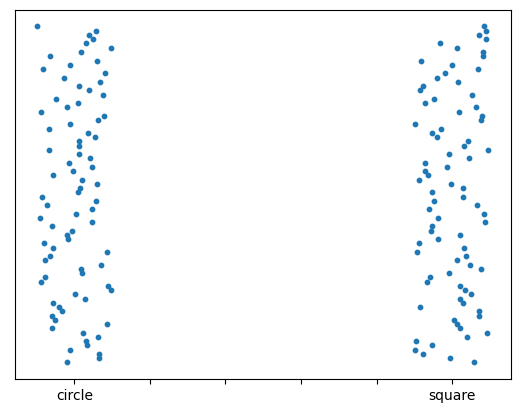

0

In [4]:
# visiable
#  TODO 可视化

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

# 绘图展示数据，每类数据点以不同的颜色显示


def showFigure():
    # get y from trainSet
    y_train = []
    for i in range(len(trainSet)):
        y_train.append(trainSet[i][0])
    # get x from trainSet
    x_train = []
    for i in range(len(trainSet)):
        x_train.append(float(trainSet[i][1])+random.random()*0.2-0.1)
    print(x_train)
    # result set
    y_test = []
    for i in range(len(testSet)):
        y_test.append(testSet[i][0])
    x_test = []
    for i in range(len(testSet)):
        x_test.append(float(testSet[i][1])+random.random()*0.2-0.1)
    plt.scatter(x_train, y_train, s=10)
    plt.scatter(x_test, y_test, c="g", s=10)
    # 关闭y轴
    plt.yticks([])
    # x轴标记
    xData = [1, 1.2, 1.4, 1.6, 1.8, 2]
    xLim = ["circle", "", "", "", "", "square"]
    plt.xticks(xData, xLim)
    plt.show()
    return 0


showFigure()
